In [1]:
!git clone https://github.com/cbtn-data-science-ml/ml_datasets.git

Cloning into 'ml_datasets'...
remote: Enumerating objects: 13046, done.
remote: Counting objects: 100% (3021/3021), done.
remote: Compressing objects: 100% (3018/3018), done.
remote: Total 13046 (delta 0), reused 3021 (delta 0), pack-reused 10025
Receiving objects: 100% (13046/13046), 629.29 MiB | 11.31 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (14004/14004), done.


In [3]:
import os
os.chdir('ml_datasets')

In [4]:
%pwd

'/Users/barrios/Desktop/GitHub/tensorflow-professional-developer/08_build_multiclass_food_10_classifier/ml_datasets'

In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    'food_10/train/',
    target_size=(200,200),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    'food_10/test/',
    target_size=(200,200),
    batch_size=32,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [17]:
model = Sequential([
    Conv2D(10, (3,3), input_shape=(200, 200, 3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

In [20]:
model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


2024-06-04 08:13:59.879200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


250/250 [==============================] - ETA: 0s - loss: 2.1797 - accuracy: 0.2118

2024-06-04 08:14:23.702052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


250/250 [==============================] - 28s 110ms/step - loss: 2.1797 - accuracy: 0.2118 - val_loss: 1.9259 - val_accuracy: 0.3270
Epoch 2/10
250/250 [==============================] - 28s 113ms/step - loss: 1.6228 - accuracy: 0.4546 - val_loss: 1.8235 - val_accuracy: 0.3670
Epoch 3/10
250/250 [==============================] - 28s 112ms/step - loss: 1.1741 - accuracy: 0.6184 - val_loss: 2.1256 - val_accuracy: 0.3460
Epoch 4/10
250/250 [==============================] - 28s 111ms/step - loss: 0.7870 - accuracy: 0.7467 - val_loss: 2.2988 - val_accuracy: 0.3670
Epoch 5/10
250/250 [==============================] - 28s 112ms/step - loss: 0.4682 - accuracy: 0.8549 - val_loss: 3.1840 - val_accuracy: 0.3085
Epoch 6/10
250/250 [==============================] - 28s 112ms/step - loss: 0.2429 - accuracy: 0.9279 - val_loss: 3.6461 - val_accuracy: 0.3265
Epoch 7/10
250/250 [==============================] - 28s 113ms/step - loss: 0.1341 - accuracy: 0.9629 - val_loss: 4.8328 - val_accuracy: 0.3

In [55]:
import matplotlib.pyplot as plt

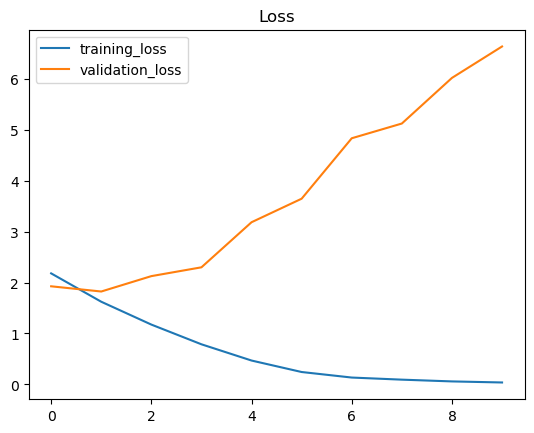

In [56]:
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='training_loss')
plt.plot(range(len(history.history['loss'])), history.history['val_loss'], label='validation_loss')
plt.title('Loss')
plt.legend()

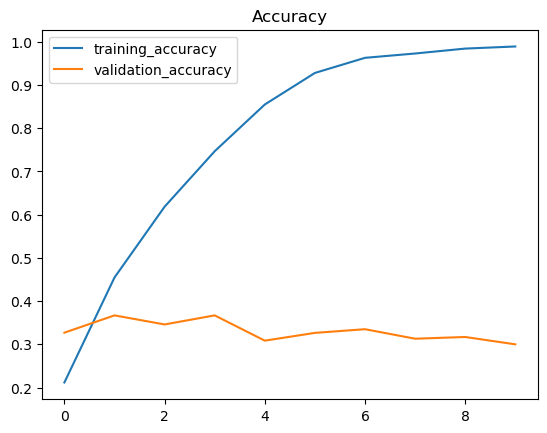

In [60]:
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='training_accuracy')
plt.plot(range(len(history.history['accuracy'])), history.history['val_accuracy'], label='validation_accuracy')
plt.title('Accuracy')
plt.legend()

In [ ]:
# More Data Points
# Improve Data Quality
# Data Agumentation
# Transfer Learning
# Learning Rate